<a href="https://colab.research.google.com/github/JNarimatsu/One_Challenge_Alura_Store/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [12]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [106]:
fat_loja1 = loja['Preço'].sum()

In [107]:
fat_loja2 = loja2['Preço'].sum()

In [108]:
fat_loja3 = loja3['Preço'].sum()

In [109]:
fat_loja4 = loja4['Preço'].sum()

In [110]:
faturamento = pd.DataFrame({
    'DataFrame': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [fat_loja1, fat_loja2, fat_loja3, fat_loja4]
})

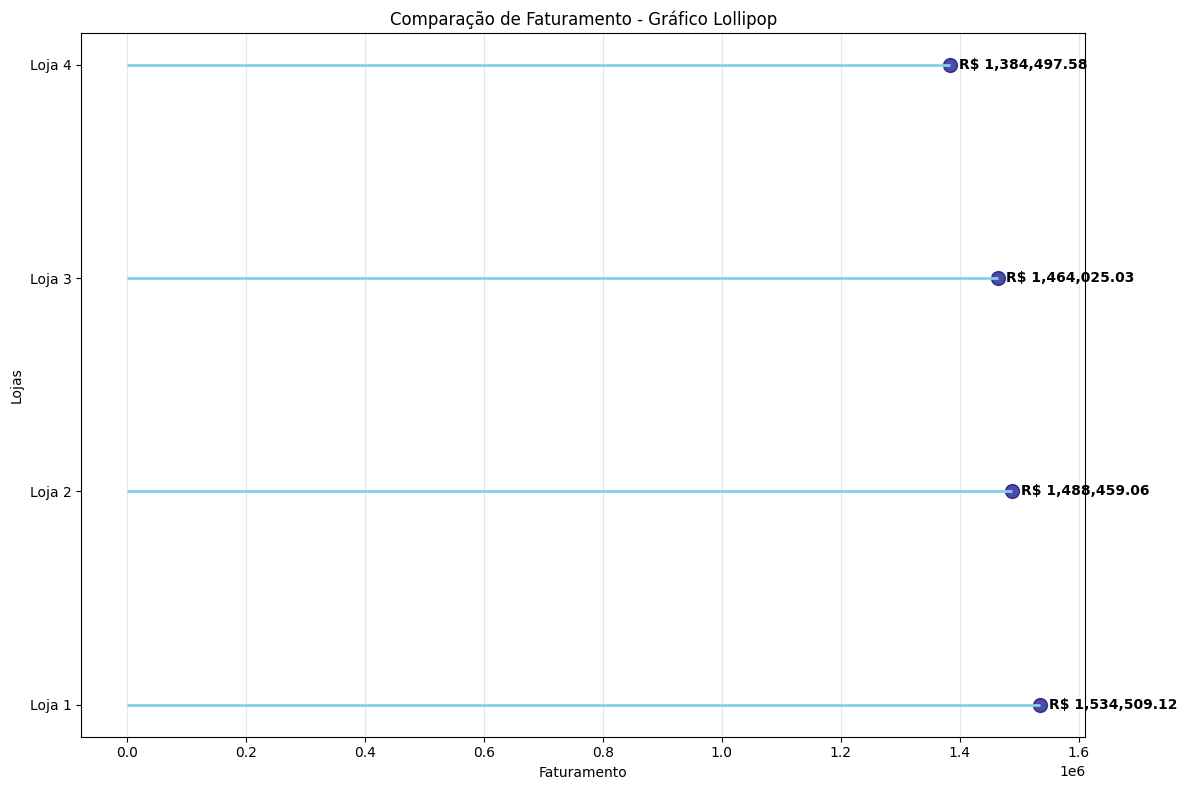

In [111]:
plt.figure(figsize=(12, 8))
plt.hlines(y=faturamento['DataFrame'], xmin=0, xmax=faturamento['Faturamento'],
           color='skyblue', linewidth=2)
plt.scatter(faturamento['Faturamento'], faturamento['DataFrame'],
           s=100, color='navy', alpha=0.7)
plt.title('Comparação de Faturamento - Gráfico Lollipop')
plt.xlabel('Faturamento')
plt.ylabel('Lojas')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(faturamento['Faturamento']):
    plt.text(v + v*0.01, i, f'R$ {v:,.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

A loja um tem maior faturamente, seguinda pelas lojas 2 e 3, com diferença de 24.434,03 reais. Com menor faturamento temos a loja 4 com uma diferença de   150.011,54 reais comparada a loja 1.

# 2. Vendas por Categoria

In [112]:
cat1 = loja['Categoria do Produto'].value_counts()

In [113]:
cat2 = loja2['Categoria do Produto'].value_counts()

In [114]:
cat3 = loja3['Categoria do Produto'].value_counts()

In [115]:
cat4 = loja4['Categoria do Produto'].value_counts()

In [116]:
venda_categoria = pd.DataFrame({
    'Loja 1': cat1,
    'Loja 2': cat2,
    'Loja 3': cat3,
    'Loja 4': cat4
}).fillna(0)

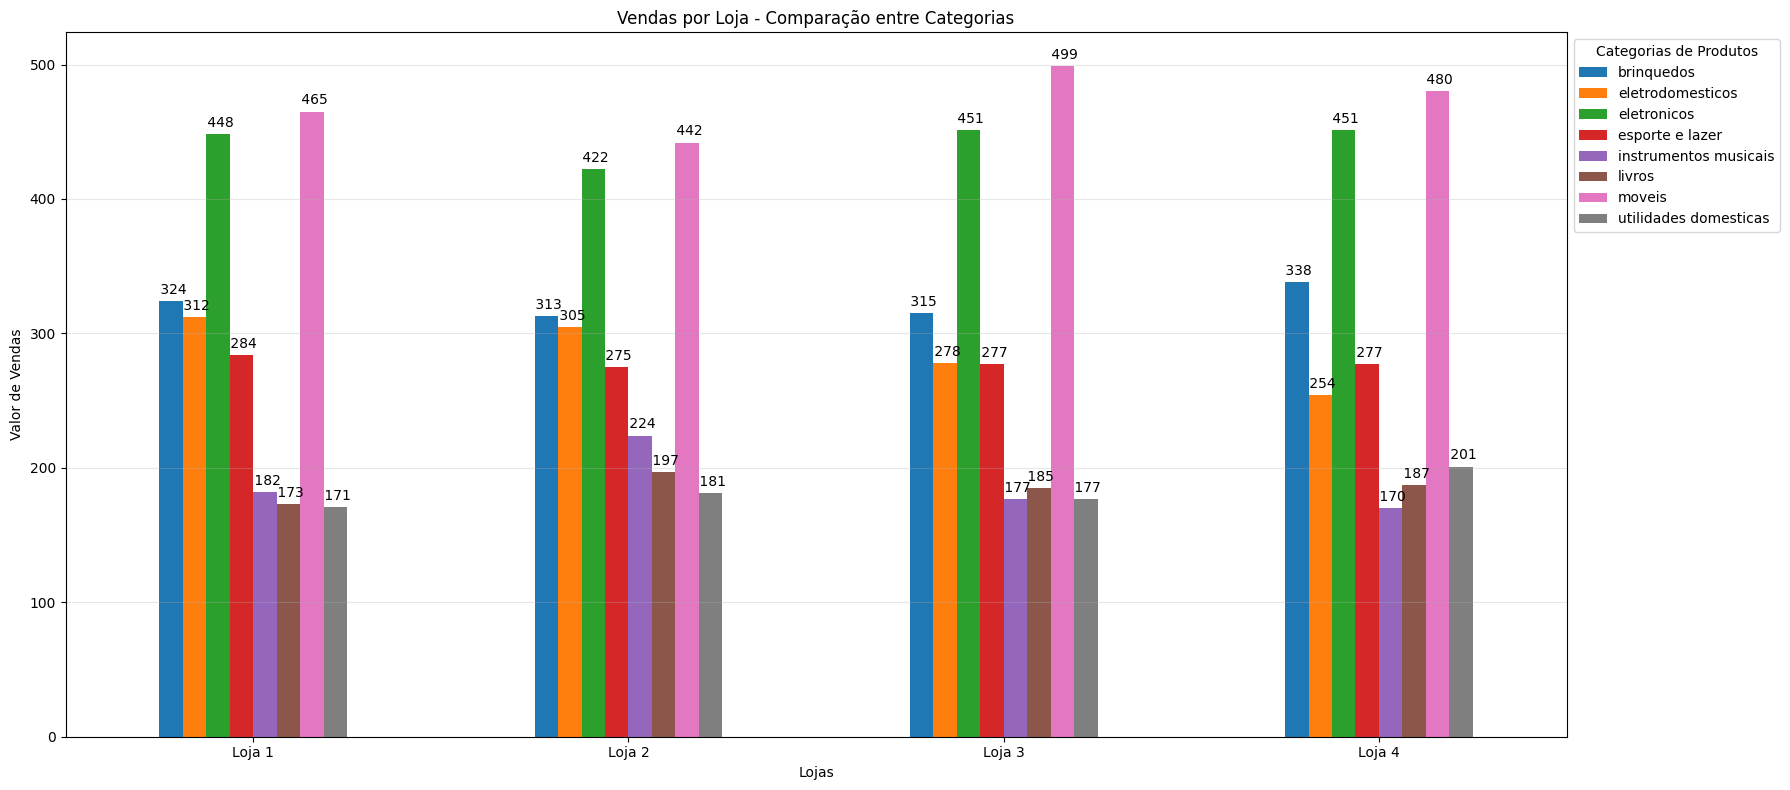

In [117]:
venda_transposto = venda_categoria.T


ax = venda_transposto.plot.bar(figsize=(18, 8))
plt.title('Vendas por Loja - Comparação entre Categorias')
plt.xlabel('Lojas')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Categorias de Produtos', loc='upper left',
           bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt=' %.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()



As categorias Móveis e eletrônicos são as mais vendidas, seguido por brinquedos em todas as lojas. Nas lojas 1, 2 e 3 utilidades domésticas é a menos vendida, mas na loja 4 temos instrumentos musicais como a menos vendida.

# 3. Média de Avaliação das Lojas


In [118]:
nota1 = loja['Avaliação da compra'].mean()

In [119]:
nota2 = loja2['Avaliação da compra'].mean()

In [120]:
nota3 = loja3['Avaliação da compra'].mean()

In [121]:
nota4 = loja4['Avaliação da compra'].mean()

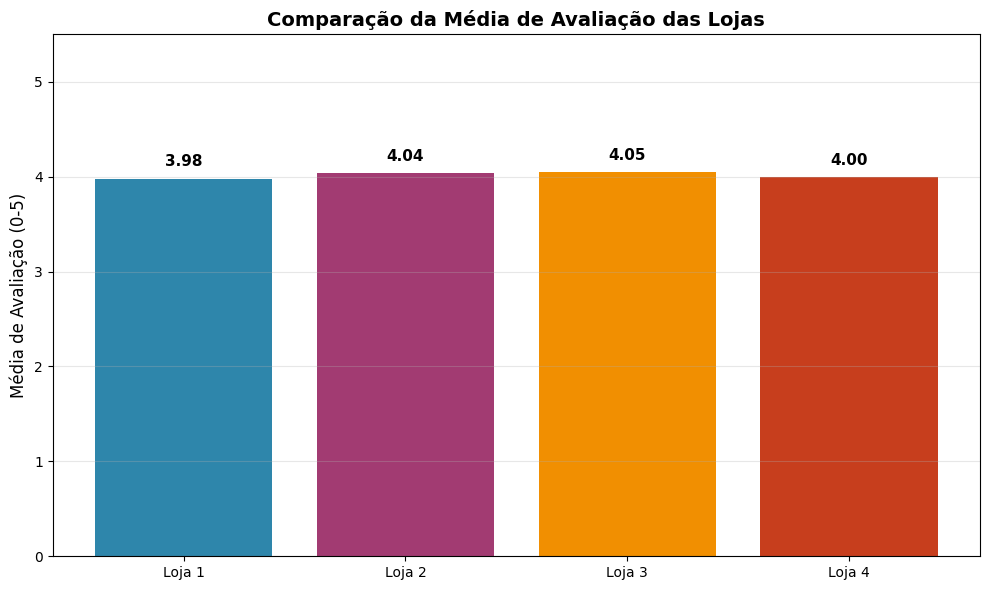

In [122]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias_avaliacao = [nota1, nota2, nota3, nota4]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, medias_avaliacao, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])

plt.title('Comparação da Média de Avaliação das Lojas', fontsize=14, fontweight='bold')
plt.ylabel('Média de Avaliação (0-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.grid(axis='y', alpha=0.3)

for bar, valor in zip(bars, medias_avaliacao):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

A média das avaliações tem poucas variações, mas é possível verificar que as lojas 3 e 4 são as mais bem avaliadas.

# 4. Produtos Mais e Menos Vendidos

In [123]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [127]:
loja['Produto'].value_counts()

,count
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56
Blocos de montar,56
Bola de basquete,55
Bicicleta,54
Copo térmico,54


# 5. Frete Médio por Loja